### graphviz
Graphviz is open source graph visualization software. Graph visualization is a way of representing structural information as diagrams of abstract graphs and networks. (http://www.graphviz.org/)

In [2]:
from graphviz import Digraph

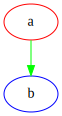

In [24]:
# hello world
g = Digraph('测试图片')
g.node(name='a',color='red')
g.node(name='b',color='blue')
g.edge('a','b',color='green')
# g.view()  # 输出.gv文本和指定格式的文件（default=pdf）
g # 直接显示

In [26]:
g.node?

Signature: g.node(name, label=None, _attributes=None, **attrs)
Docstring:
Create a node.

Args:
    name: Unique identifier for the node inside the source.
    label: Caption to be displayed (defaults to the node ``name``).
    attrs: Any additional node attributes (must be strings).
File:      /usr/local/lib/python3.6/dist-packages/graphviz/dot.py
Type:      method


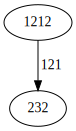

In [36]:
g = Digraph('Suffix')
g.node('1',"1212")
g.node('2',"232")
g.edge('1',"2","121")
g

In [23]:
def plot_model(tree, name):
    g = Digraph("G", filename=name, format='png', strict=False)  # format 指定输出文件的格式
    first_label = list(tree.keys())[0]
    g.node("0", first_label)
    _sub_plot(g, tree, "0")
#     g.view()
    return g

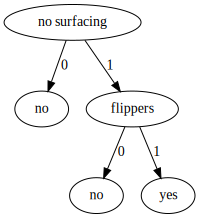

In [22]:
"""
"""
root = "0"
def _sub_plot(g, tree, inc):
    global root

    first_label = list(tree.keys())[0]
    ts = tree[first_label]
    for i in ts.keys():
        if isinstance(tree[first_label][i], dict):
            root = str(int(root) + 1)
            g.node(root, list(tree[first_label][i].keys())[0])
            g.edge(inc, root, str(i))
            _sub_plot(g, tree[first_label][i], root)
        else:
            root = str(int(root) + 1)
            g.node(root, tree[first_label][i])
            g.edge(inc, root, str(i))


d1 = {"no surfacing": {0: "no", 1: {"flippers": {0: "no", 1: "yes"}}}}

d2 = {'tearRate': {'reduced': 'no lenses', 'normal': {'astigmatic': {'yes': {
    'prescript': {'myope': 'hard', 'hyper': {'age': {'young': 'hard', 'presbyopic': 'no lenses', 'pre': 'no lenses'}}}},
    'no': {'age': {'young': 'soft', 'presbyopic': {
        'prescript': {'myope': 'no lenses',
                      'hyper': 'soft'}},
                   'pre': 'soft'}}}}}}

plot_model(d1, "hello.gv")
# plot_model(d2, "hello2.gv")
